In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter 
from mpl_toolkits.mplot3d import Axes3D
from statannot import add_stat_annotation
import pingouin as pg
import re

In [30]:
path = "C:/Users/StuartM/Downloads/MscProject-main/MscProject-main/MSC Project\ForceD unity demo/Data ID19/"

files = os.listdir(path)

print(files)

['ID_19_Phase_Baseline_Trial_00.json', 'ID_19_Phase_Baseline_Trial_01.json', 'ID_19_Phase_Baseline_Trial_010.json', 'ID_19_Phase_Baseline_Trial_011.json', 'ID_19_Phase_Baseline_Trial_012.json', 'ID_19_Phase_Baseline_Trial_013.json', 'ID_19_Phase_Baseline_Trial_014.json', 'ID_19_Phase_Baseline_Trial_015.json', 'ID_19_Phase_Baseline_Trial_016.json', 'ID_19_Phase_Baseline_Trial_017.json', 'ID_19_Phase_Baseline_Trial_018.json', 'ID_19_Phase_Baseline_Trial_019.json', 'ID_19_Phase_Baseline_Trial_02.json', 'ID_19_Phase_Baseline_Trial_03.json', 'ID_19_Phase_Baseline_Trial_04.json', 'ID_19_Phase_Baseline_Trial_05.json', 'ID_19_Phase_Baseline_Trial_06.json', 'ID_19_Phase_Baseline_Trial_07.json', 'ID_19_Phase_Baseline_Trial_08.json', 'ID_19_Phase_Baseline_Trial_09.json', 'ID_19_Phase_Test_Trial_00.json', 'ID_19_Phase_Test_Trial_01.json', 'ID_19_Phase_Test_Trial_010.json', 'ID_19_Phase_Test_Trial_011.json', 'ID_19_Phase_Test_Trial_012.json', 'ID_19_Phase_Test_Trial_013.json', 'ID_19_Phase_Test_Tri

In [31]:
tmpDF = None
df = None

i = 0 

for file in files:    
    tmpDF = pd.read_json(path + file)

#     tmpDF.insert(1,'trial', file[-1-6:-1-4])
#     tmpDF.insert(2,'phsae', file[-1-6:-1-4])
    
    if df is None:
        df = tmpDF
    else:
        df = pd.concat((df, tmpDF))

    i = i+1    

df

,frameNum,userID,trialNumber,phase,force_type,positional_error,x_target_pos,y_target_pos,z_target_pos,x_user_pos,y_user_pos,z_user_pos,x_pos_error,y_pos_error,z_pos_error,time
0,0,User_19,0,Baseline,,2.754971,-5.000000,6.000000,2.000000,-3.277791,5.182313,0.011219,-1.722209,0.817687,1.988781,173.088900
1,1,User_19,0,Baseline,,1.871443,-1.588886,4.400259,-0.198703,-3.277467,5.179403,0.010884,1.688582,-0.779144,-0.209587,173.100000
2,2,User_19,0,Baseline,,1.871443,-1.588886,4.400259,-0.198703,-3.277467,5.179403,0.010884,1.688582,-0.779144,-0.209587,173.111115
3,3,User_19,0,Baseline,,1.879453,-1.571803,4.400658,-0.196709,-3.273538,5.170945,0.010903,1.701735,-0.770287,-0.207612,173.122223
4,4,User_19,0,Baseline,,1.884964,-1.557521,4.400991,-0.195043,-3.268501,5.164569,0.011326,1.710980,-0.763577,-0.206369,173.133331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1346,User_19,9,Training,No_Force,0.123134,-2.596878,4.400892,0.160375,-2.478720,4.386271,0.191792,-0.118158,0.014621,-0.031417,719.388900
1347,1347,User_19,9,Training,No_Force,0.122352,-2.598326,4.400478,0.162879,-2.482484,4.383868,0.198586,-0.115841,0.016610,-0.035707,719.400000
1348,1348,User_19,9,Training,No_Force,0.122068,-2.599846,4.400044,0.165535,-2.485783,4.381746,0.204972,-0.114063,0.018298,-0.039437,719.411133
1349,1349,User_19,9,Training,No_Force,0.121749,-2.599846,4.400044,0.165535,-2.489114,4.379647,0.211852,-0.110732,0.020397,-0.046316,719.422241


In [41]:
poln = 135  # 51
order = 2  # 3

sampling_rate = 100
df['user_x_vel'] = np.gradient(savgol_filter(df['x_user_pos'], poln, order), (1 / sampling_rate))
df['user_y_vel'] = np.gradient(savgol_filter(df['y_user_pos'], poln, order), (1 / sampling_rate))
df['user_z_vel'] = np.gradient(savgol_filter(df['z_user_pos'], poln, order), (1 / sampling_rate))

df['user_vel'] = np.sqrt(df['user_x_vel'] ** 2 + df['user_y_vel'] ** 2 + df['user_z_vel'] ** 2)

df['target_x_vel'] = np.gradient(savgol_filter(df['x_target_pos'], poln, order), (1 / sampling_rate))
df['target_y_vel'] = np.gradient(savgol_filter(df['y_target_pos'], poln, order), (1 / sampling_rate))
df['target_z_vel'] = np.gradient(savgol_filter(df['z_target_pos'], poln, order), (1 / sampling_rate))

df['target_vel'] = np.sqrt(df['target_x_vel'] ** 2 + df['target_y_vel'] ** 2 + df['target_z_vel'] ** 2)

df['Vel_Error'] = df['target_vel'] - df['user_vel']

df['group'] = df['userID'].apply(lambda x: 2 if int(re.search(r'\d+', x).group()) % 2 == 0 else 1)

df

,frameNum,userID,trialNumber,phase,force_type,positional_error,x_target_pos,y_target_pos,z_target_pos,x_user_pos,...,user_x_vel,user_y_vel,user_z_vel,user_vel,target_x_vel,target_y_vel,target_z_vel,target_vel,Vel_Error,group
0,0,User_19,0,Baseline,,2.754971,-5.000000,6.000000,2.000000,-3.277791,...,-2.702843,0.396223,2.186808,3.499212,1.733311,-0.281981,-0.300322,1.781593,-1.717619,1
1,1,User_19,0,Baseline,,1.871443,-1.588886,4.400259,-0.198703,-3.277467,...,-2.670621,0.392325,2.161912,3.458323,1.728275,-0.280073,-0.297700,1.775950,-1.682372,1
2,2,User_19,0,Baseline,,1.871443,-1.588886,4.400259,-0.198703,-3.277467,...,-2.606177,0.384531,2.112118,3.376547,1.718203,-0.276258,-0.292457,1.764673,-1.611874,1
3,3,User_19,0,Baseline,,1.879453,-1.571803,4.400658,-0.196709,-3.273538,...,-2.541733,0.376736,2.062325,3.294772,1.708131,-0.272442,-0.287214,1.753404,-1.541368,1
4,4,User_19,0,Baseline,,1.884964,-1.557521,4.400991,-0.195043,-3.268501,...,-2.477290,0.368941,2.012532,3.213000,1.698058,-0.268626,-0.281971,1.742145,-1.470854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1346,User_19,9,Training,No_Force,0.123134,-2.596878,4.400892,0.160375,-2.478720,...,-0.233248,-0.051253,0.223212,0.326887,-0.146262,-0.041764,0.409663,0.436991,0.110104,1
1347,1347,User_19,9,Training,No_Force,0.122352,-2.598326,4.400478,0.162879,-2.482484,...,-0.234659,-0.051632,0.223926,0.328441,-0.146250,-0.041761,0.414396,0.441426,0.112985,1
1348,1348,User_19,9,Training,No_Force,0.122068,-2.599846,4.400044,0.165535,-2.485783,...,-0.236069,-0.052010,0.224640,0.329995,-0.146238,-0.041757,0.419128,0.445867,0.115872,1
1349,1349,User_19,9,Training,No_Force,0.121749,-2.599846,4.400044,0.165535,-2.489114,...,-0.237479,-0.052389,0.225354,0.331550,-0.146226,-0.041753,0.423860,0.450314,0.118764,1


<AxesSubplot:xlabel='phase', ylabel='Vel_Error'>

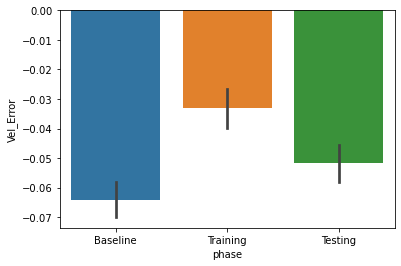

In [34]:
order = ['Baseline', 'Training', 'Testing']
sns.barplot(data=df, x='phase', y='Vel_Error', order=order)

<AxesSubplot:xlabel='phase', ylabel='positional_error'>

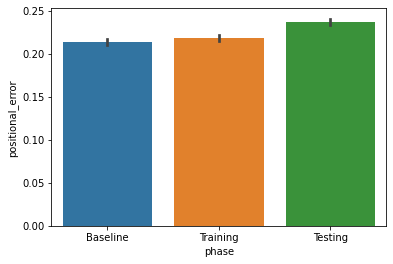

In [35]:
order = ['Baseline', 'Training', 'Testing']
sns.barplot(data=df, x='phase', y='positional_error', order=order)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

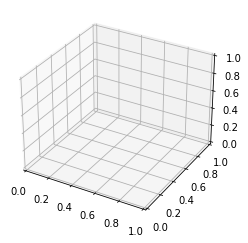

In [27]:
# Filter the DataFrame for userID = 0, phase = 'training', and trialNumber = 2
df_filtered = df[ (df['phase'] == 'Testing') & (df['trialNumber'] == 18)]

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates from the filtered DataFrame
x_target = df_filtered['x_target_pos']
y_target = df_filtered['y_target_pos']
z_target = df_filtered['z_target_pos']

x_user = df_filtered['x_user_pos']
y_user = df_filtered['y_user_pos']
z_user = df_filtered['z_user_pos']

# Plot the 3D lines
ax.plot(x_target, y_target, z_target, label='Target Position')
ax.plot(x_user, y_user, z_user, label='User Position')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Line Graph Example for userID = 4, phase = training, trialNumber = 18')

# Add legend
ax.legend()

# Show the plot
plt.show()


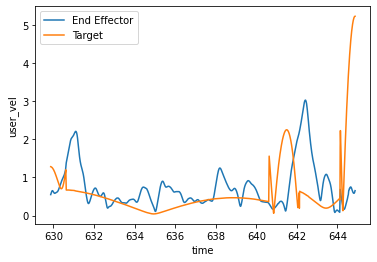

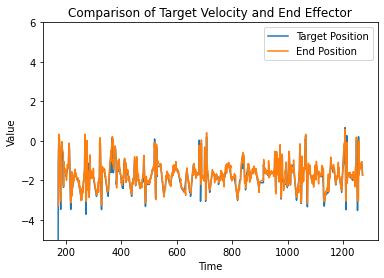

In [36]:
sns.lineplot(data=df, x='time', y='x_target_pos', label='Target Position')
sns.lineplot(data=df, x='time', y='x_user_pos', label='End Position')  # Adding the new y variable
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Target Velocity and End Effector')
plt.legend()
plt.ylim([-5,6])
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

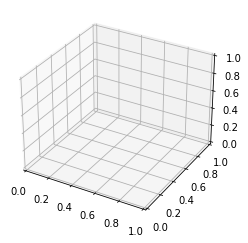

In [37]:
# Filter the DataFrame for userID = 0, phase = 'training', and trialNumber = 2
df_filtered = df[ (df['phase'] == 'Training') & (df['trialNumber'] == 10)]

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates from the filtered DataFrame
x_target = df_filtered['target_x_vel']
y_target = df_filtered['target_y_vel']
z_target = df_filtered['target_z_vel']

x_user = df_filtered['user_x_vel']
y_user = df_filtered['user_y_vel']
z_user = df_filtered['user_z_vel']

# Plot the 3D lines
ax.plot(x_target, y_target, z_target, label='Target Velocity')
ax.plot(x_user, y_user, z_user, label='User Velocity')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Line Graph Example for userID = 4, phase = training, trialNumber = 10')

# Add legend
ax.legend()

# Show the plot
plt.show()
